In [1]:
import math

import schemdraw
from schemdraw import flow
import schemdraw.elements as elm
#schemdraw.use('svg')
#schemdraw.settextmode('text')

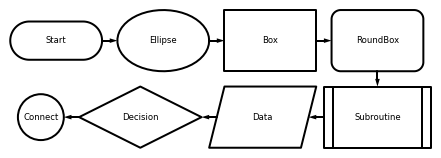

In [2]:
d = schemdraw.Drawing(fontsize=10, unit=.5)
d.add(flow.Start().label('Start').drop('E'))
d.add(flow.Arrow())
d.add(flow.Ellipse().label('Ellipse'))
d.add(flow.Arrow())
d.add(flow.Box(label='Box'))
d.add(flow.Arrow())
d.add(flow.RoundBox(label='RoundBox').drop('S'))
d.add(flow.Arrow().down())
d.add(flow.Subroutine(label='Subroutine').drop('W'))
d.add(flow.Arrow().left())
d.add(flow.Data(label='Data'))
d.add(flow.Arrow())
d.add(flow.Decision(label='Decision'))
d.add(flow.Arrow())
d.add(flow.Connect(label='Connect'))
d.draw()

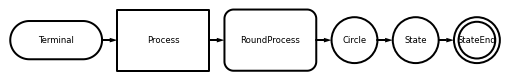

In [3]:
# Duplicate names
d = schemdraw.Drawing(fontsize=10, unit=.5)
d.add(flow.Terminal().label('Terminal').drop('E'))
d.add(flow.Arrow())
d.add(flow.Process().label('Process'))
d.add(flow.Arrow())
d.add(flow.RoundProcess().label('RoundProcess'))
d.add(flow.Arrow())
d.add(flow.Circle(label='Circle'))
d.add(flow.Arrow())
d.add(flow.State(label='State'))
d.add(flow.Arrow())
d.add(flow.StateEnd(label='StateEnd'))
d.draw()

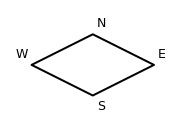

In [4]:
d.add(flow.Decision(N='N', S='S', E='E', W='W'))

In [5]:
def testanchors(element):
    d = schemdraw.Drawing()
    d += (box := element())
    d += elm.Dot(radius=.1).at(box.N).color('red')
    d += elm.Dot(radius=.1).at(box.NNE).color('orangered')
    d += elm.Dot(radius=.1).at(box.NE).color('orange')
    d += elm.Dot(radius=.1).at(box.ENE).color('gold')
    d += elm.Dot(radius=.1).at(box.E).color('yellow')
    d += elm.Dot(radius=.1).at(box.ESE).color('yellowgreen')
    d += elm.Dot(radius=.1).at(box.SE).color('green')
    d += elm.Dot(radius=.1).at(box.SSE).color('lightseagreen')
    d += elm.Dot(radius=.1).at(box.S).color('turquoise')
    d += elm.Dot(radius=.1).at(box.SSW).color('teal')
    d += elm.Dot(radius=.1).at(box.SW).color('blue')
    d += elm.Dot(radius=.1).at(box.WSW).color('darkslateblue')
    d += elm.Dot(radius=.1).at(box.W).color('blueviolet')
    d += elm.Dot(radius=.1).at(box.WNW).color('darkviolet')
    d += elm.Dot(radius=.1).at(box.NW).color('violet')
    d += elm.Dot(radius=.1).at(box.NNW).color('mediumvioletred')
    return d

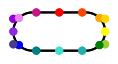

In [6]:
testanchors(flow.Start)

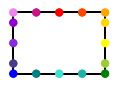

In [7]:
testanchors(flow.Box)

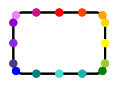

In [8]:
testanchors(flow.RoundBox)

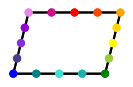

In [9]:
testanchors(flow.Data)

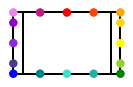

In [10]:
testanchors(flow.Subroutine)

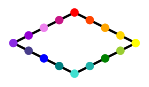

In [11]:
testanchors(flow.Decision)

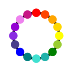

In [12]:
testanchors(flow.Circle)

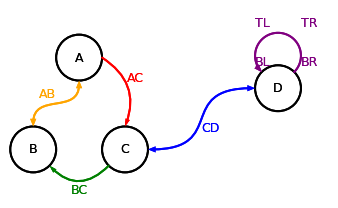

In [13]:
d = schemdraw.Drawing()
d += (A := flow.State().label('A').at((1.5, 3)))
d += (B := flow.State().label('B').at((0, 0)))
d += (C := flow.State().label('C').at((3, 0)))
d += (D := flow.State().label('D').at((8, 2)))

d += elm.Arc2(arrow='>', k=.4).at(A.E).to(C.N).color('red').label('AC')
d += elm.ArcZ(arrow='<>').at(C.E).to(D.W).color('blue').label('CD')
d += elm.ArcN(arrow='<>').at(A.S).to(B.N).color('orange').label('AB')
d += elm.Arc2(arrow='>', k=.5).at(C.SW).to(B.SE).color('green').label('BC')
d += (elm.ArcLoop(radius=.75,arrow='<').at(D.NW).to(D.NE).color('purple')
      .label('TR', loc='TR').label('TL', loc='TL').label('BR', loc='BR').label('BL', loc='BL'))
d

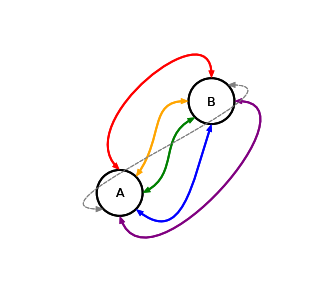

In [14]:
d = schemdraw.Drawing()
d += (A := flow.State().label('A'))
d += (B := flow.State().label('B').at((3, 3)))
d += (a1:=elm.Arc3(th1=135, th2=90, arrow='<>').at(A.N).to(B.N).color('red'))
d += elm.Arc3(th1=45, th2=180, arrow='<>').at(A.NE).to(B.W).color('orange')
d += elm.Arc3(th1=20, th2=200, arrow='<>').at(A.E).to(B.SW).color('green')
d += (a2:=elm.Arc3(th1=-35, th2=-110, arrow='<>').at(A.SE).to(B.S).color('blue'))
d += elm.Arc3(th1=-70, th2=0, arrow='<>').at(A.S).to(B.E).color('purple')
d += elm.Arc3(th1=180, th2=0, arrow='<>').at(A.SW).to(B.NE).color('gray').linewidth(1).linestyle('--')
d

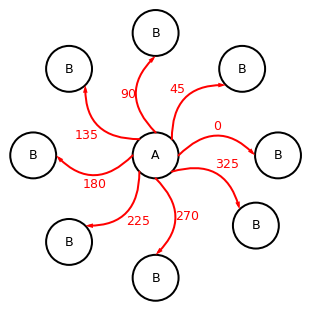

In [15]:
d = schemdraw.Drawing()
d += (A := flow.State().label('A'))
circles = []
for th, anchor, anchor2 in zip([0, 45, 90, 135, 180, 225, 270, 325],
                               ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                               ['W', 'SW', 'S', 'SE', 'E', 'NE', 'N', 'NW']):
    x = 4*math.cos(math.radians(th))
    y = 4*math.sin(math.radians(th))
    circles.append(flow.Circle().label('B').at((x, y)))
    d += circles[-1]
    d += elm.Arc2(arrow='>').at(A.absanchors[anchor]).to(circles[-1].absanchors[anchor2]).color('red').label(str(th))
d.draw()

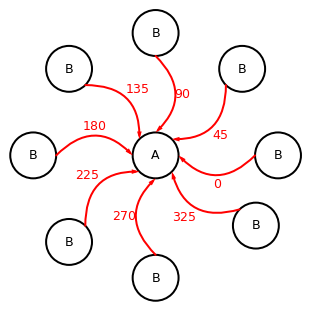

In [16]:
d = schemdraw.Drawing()
d += (A := flow.State().label('A'))
circles = []
for th, anchor, anchor2 in zip([0, 45, 90, 135, 180, 225, 270, 325],
                               ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                               ['W', 'SW', 'S', 'SE', 'E', 'NE', 'N', 'NW']):
    x = 4*math.cos(math.radians(th))
    y = 4*math.sin(math.radians(th))
    circles.append(flow.Circle().label('B').at((x, y)))
    d += circles[-1]
    d += elm.Arc2(arrow='>').to(A.absanchors[anchor]).at(circles[-1].absanchors[anchor2]).color('red').label(str(th))
d.draw()

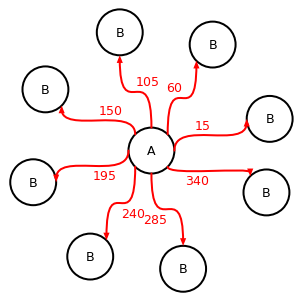

In [17]:
d = schemdraw.Drawing()
d += (A := flow.State().label('A'))
circles = []
for th, anchor, anchor2 in zip([0, 45, 90, 135, 180, 225, 270, 325],
                               ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                               ['W', 'SW', 'S', 'SE', 'E', 'NE', 'N', 'NW']):
    x = 4*math.cos(math.radians(th+15))
    y = 4*math.sin(math.radians(th+15))
    circles.append(flow.Circle().label('B').at((x, y)))
    d += circles[-1]
    d += elm.ArcN(k=1, arrow='<').to(A.absanchors[anchor]).at(circles[-1].absanchors[anchor2]).color('red').label(str(th+15))
d.draw()